# Projeto final HUB 2025

## Análise exploratória

 ##### Bibliotecas utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    balanced_accuracy_score,
    recall_score,
    matthews_corrcoef,
    jaccard_score, hamming_loss
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

### Análise inicial do DataFrame

In [2]:
df = pd.read_csv('bootcamp_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35260 entries, 0 to 35259
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               35260 non-null  int64  
 1   id_produto                       35260 non-null  object 
 2   tipo                             35260 non-null  object 
 3   temperatura_ar                   34644 non-null  float64
 4   temperatura_processo             34661 non-null  float64
 5   umidade_relativa                 35260 non-null  float64
 6   velocidade_rotacional            34509 non-null  float64
 7   torque                           34637 non-null  float64
 8   desgaste_da_ferramenta           34308 non-null  float64
 9   falha_maquina                    35260 non-null  object 
 10  FDF (Falha Desgaste Ferramenta)  35260 non-null  object 
 11  FDC (Falha Dissipacao Calor)     35260 non-null  object 
 12  FP (Falha Potencia

In [3]:
df.head()

,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
0,0,L56434,L,298.3,309.1,90.0,1616.0,31.1,195.0,não,False,False,Não,False,Não
1,1,L48741,L,298.2,308.4,90.0,1388.0,53.8,137.0,Não,False,False,Não,False,Não
2,2,L48850,L,298.2,307.8,90.0,1528.0,31.1,NaN,Não,N,False,Não,False,Não
3,3,M20947,M,300.9,310.8,90.0,1599.0,33.0,7.0,não,False,False,Não,False,não
4,4,L53849,L,-36.0,310.5,90.0,1571.0,33.9,NaN,não,N,False,não,False,Não


#####  - Variáveis categóricas: id_produto, tipo, falha máquina, FDF (Falha Desgaste Ferramenta), FDC (Falha Dissipacao Calor), FP (Falha Potencia) e FA (Falha Aleatoria).

##### - Variável numérica discreta: id.

##### - Variáveis numéricas contínuas: temperatura_ar, temperatura_processo, umidade_relativa, velocidade_rotacional, torque, desgaste_da_ferramenta.

##### - Variável booleana: FA (Falha Aleatoria).

In [4]:
# Contagem valores únicos e nulos por coluna
uni = df.nunique()
null = df.isnull().sum()
print(pd.DataFrame({'valores_unicos': uni, 'valores_nulos': null}))

                                 valores_unicos  valores_nulos
id                                        35260              0
id_produto                                 9708              0
tipo                                          3              0
temperatura_ar                               94            616
temperatura_processo                         83            599
umidade_relativa                             36              0
velocidade_rotacional                       916            751
torque                                      579            623
desgaste_da_ferramenta                      247            952
falha_maquina                                 8              0
FDF (Falha Desgaste Ferramenta)               6              0
FDC (Falha Dissipacao Calor)                  6              0
FP (Falha Potencia)                           8              0
FTE (Falha Tensao Excessiva)                  2              0
FA (Falha Aleatoria)                          7        

In [5]:
# Remover linhas com valores nulos
df.dropna(inplace=True)

# Contagem valores únicos e nulos por coluna após remoção de nulos
uni = df.nunique()
null = df.isnull().sum()
print(pd.DataFrame({'valores_unicos': uni, 'valores_nulos': null}))

                                 valores_unicos  valores_nulos
id                                        31859              0
id_produto                                 9526              0
tipo                                          3              0
temperatura_ar                               94              0
temperatura_processo                         83              0
umidade_relativa                             16              0
velocidade_rotacional                       902              0
torque                                      574              0
desgaste_da_ferramenta                      247              0
falha_maquina                                 8              0
FDF (Falha Desgaste Ferramenta)               6              0
FDC (Falha Dissipacao Calor)                  6              0
FP (Falha Potencia)                           8              0
FTE (Falha Tensao Excessiva)                  2              0
FA (Falha Aleatoria)                          7        

In [6]:
# Estatísticas descritivas para variáveis numéricas contínuas
df.describe()
print(df.describe())

                 id  temperatura_ar  temperatura_processo  umidade_relativa  \
count  31859.000000    31859.000000          31859.000000      31859.000000   
mean   17657.000471      270.005713            280.441266         89.999319   
std    10171.082805       95.674381             96.969888          0.096583   
min        0.000000      -36.000000            -38.000000         80.747640   
25%     8846.500000      297.900000            308.500000         90.000000   
50%    17696.000000      299.600000            309.800000         90.000000   
75%    26457.500000      301.100000            310.900000         90.000000   
max    35259.000000      304.500000            313.800000         94.575256   

       velocidade_rotacional        torque  desgaste_da_ferramenta  
count           31859.000000  31859.000000            31859.000000  
mean             1379.723877     40.230137               75.433347  
std               494.062814      8.824906              109.108695  
min         

### Análise univariada da variável 'tipo'

In [7]:
# Distribuição percentual para variável categórica 'tipo'
df['tipo'].value_counts(normalize=True)*100  

tipo
L    67.764211
M    24.862676
H     7.373113
Name: proportion, dtype: float64

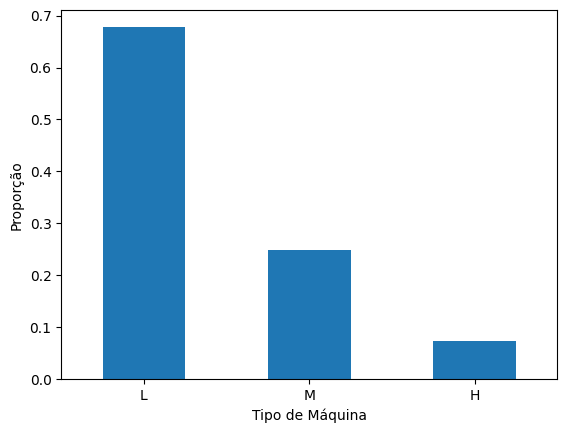

In [8]:
# Gráfico de barras para variável categórica 'tipo'
ax = df['tipo'].value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('Tipo de Máquina')
ax.set_ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

#### Quase 70% das máquinas são tipo 'L'.

### Análise univariada e tratamento das variáveis de falha.

##### Variável falha_maquina

Antes do tratamento:
falha_maquina
Não    62.161399
não    32.107097
N       1.946075
0       1.927242
Sim     1.167645
sim     0.621488
1       0.034527
y       0.034527
Name: proportion, dtype: float64

Após remoção de y, 1, 0, N:
falha_maquina
Não    64.712610
não    33.424828
Sim     1.215567
sim     0.646995
Name: proportion, dtype: float64

Após padronização (Sim/Não):
falha_maquina
Não    98.137438
Sim     1.862562
Name: proportion, dtype: float64


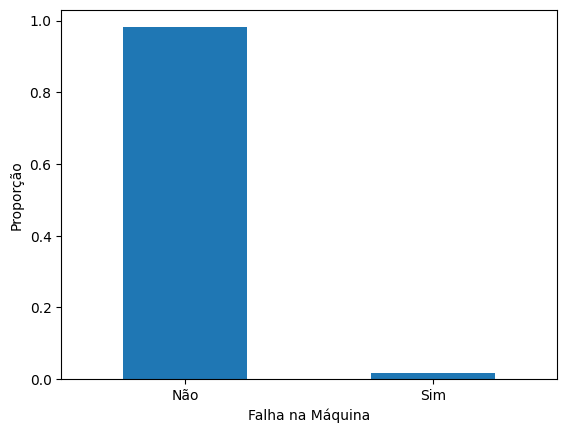

In [9]:
# Distribuição percentual para variável categórica 'falha_maquina' (antes do tratamento)
print("Antes do tratamento:")
print(df['falha_maquina'].value_counts(normalize=True) * 100)

# Eliminação das linhas indesejadas
df = df[~df['falha_maquina'].isin(['y', '1', '0', 'N'])]

# Distribuição após remoção
print("\nApós remoção de y, 1, 0, N:")
print(df['falha_maquina'].value_counts(normalize=True) * 100)

# Padronizar os valores para 'Sim' e 'Não'
df['falha_maquina'] = df['falha_maquina'].replace({'não': 'Não', 'sim': 'Sim'})

# Distribuição final após padronização
print("\nApós padronização (Sim/Não):")
print(df['falha_maquina'].value_counts(normalize=True) * 100)

# Gráfico de barras para variável categórica 'falha_maquina' após tratamento
ax = df['falha_maquina'].value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('Falha na Máquina')
ax.set_ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

##### Variável FDF (Falha Desgaste ferramenta)

Antes do tratamento:
FDF (Falha Desgaste Ferramenta)
False    95.699768
N         1.957324
0         1.947521
True      0.199327
-         0.192792
1         0.003268
Name: proportion, dtype: float64

Após remoção de -, 1, 0, N:
FDF (Falha Desgaste Ferramenta)
False    99.792149
True      0.207851
Name: proportion, dtype: float64

Após padronização (Sim/Não):
FDF (Falha Desgaste Ferramenta)
Não    99.792149
Sim     0.207851
Name: proportion, dtype: float64


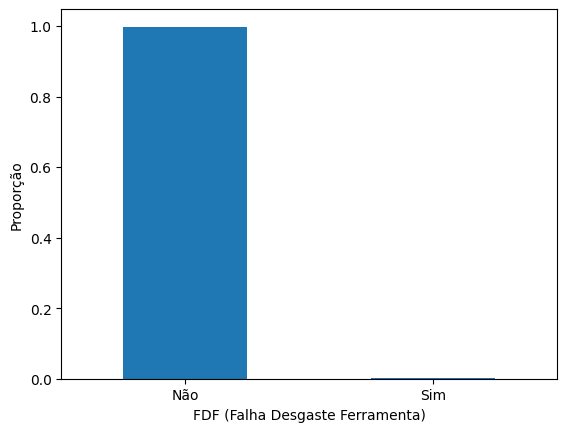

In [10]:
# Distribuição percentual para variável categórica 'FDF (Falha Desgaste Ferramenta)' (antes do tratamento)
print("Antes do tratamento:")
print(df['FDF (Falha Desgaste Ferramenta)'].value_counts(normalize=True) * 100)

# Eliminação das linhas indesejadas
df = df[~df['FDF (Falha Desgaste Ferramenta)'].isin(['-', '1','0','N'])]

# Distribuição após remoção
print("\nApós remoção de -, 1, 0, N:")
print(df['FDF (Falha Desgaste Ferramenta)'].value_counts(normalize=True) * 100)

# Mudança dos valores para 'Sim' e 'Não', tornando a variável tipo categórica
df['FDF (Falha Desgaste Ferramenta)'] = df['FDF (Falha Desgaste Ferramenta)'].replace({'False': 'Não', 'True': 'Sim'})

# Distribuição final após padronização
print("\nApós padronização (Sim/Não):")
print(df['FDF (Falha Desgaste Ferramenta)'].value_counts(normalize=True) * 100)

# Gráfico de barras para variável categórica 'FDF (Falha Desgaste Ferramenta)' após tratamento
ax = df['FDF (Falha Desgaste Ferramenta)'].value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('FDF (Falha Desgaste Ferramenta)')
ax.set_ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

##### Variável FDC (Falha Dissipacao Calor)

Antes do tratamento:
FDC (Falha Dissipacao Calor)
False    95.468175
nao       2.006951
0         1.911544
True      0.589478
1         0.013630
y         0.010222
Name: proportion, dtype: float64

Após remoção de 0, 1, y:
FDC (Falha Dissipacao Calor)
False    97.352328
nao       2.046560
True      0.601112
Name: proportion, dtype: float64

Após padronização (Sim/Não):
FDC (Falha Dissipacao Calor)
Não    99.398888
Sim     0.601112
Name: proportion, dtype: float64


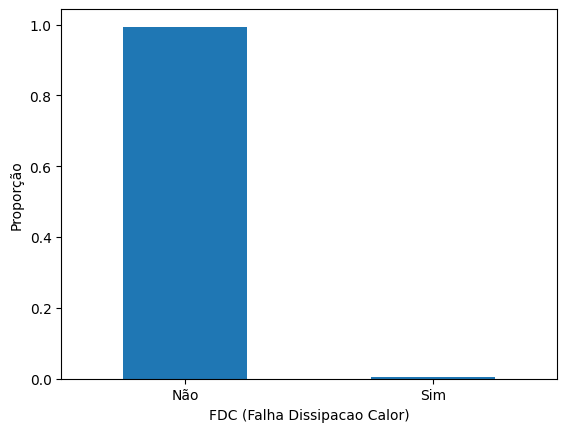

In [11]:
# Distribuição percentual para variável categórica 'FDC (Falha Dissipacao Calor)' (antes do tratamento)
print("Antes do tratamento:")
print(df['FDC (Falha Dissipacao Calor)'].value_counts(normalize=True) * 100)

# Eliminação das linhas indesejadas
df = df[~df['FDC (Falha Dissipacao Calor)'].isin(['0', '1','y'])]

# Distribuição após remoção
print("\nApós remoção de 0, 1, y:")
print(df['FDC (Falha Dissipacao Calor)'].value_counts(normalize=True) * 100)

# Padronizar os valores para 'Sim' e 'Não'
df['FDC (Falha Dissipacao Calor)'] = df['FDC (Falha Dissipacao Calor)'].replace({'nao': 'False'})

# Mudança dos valores para 'Sim' e 'Não', tornando a variável tipo categórica
df['FDC (Falha Dissipacao Calor)'] = df['FDC (Falha Dissipacao Calor)'].replace({'False': 'Não', 'True': 'Sim'})

# Distribuição final após padronização
print("\nApós padronização (Sim/Não):")
print(df['FDC (Falha Dissipacao Calor)'].value_counts(normalize=True) * 100)

# Gráfico de barras para variável categórica 'FDC (Falha Dissipacao Calor)' após tratamento
ax = df['FDC (Falha Dissipacao Calor)'].value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('FDC (Falha Dissipacao Calor)')
ax.set_ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

#### Variável FP (Falha Potencia)

Antes do tratamento:
FP (Falha Potencia)
Não    63.182766
não    32.564281
N       1.945796
0       1.942321
Sim     0.236275
sim     0.121612
1       0.006949
Name: proportion, dtype: float64

Após remoção de 1, 0, N:
FP (Falha Potencia)
Não    65.743519
não    33.884088
Sim     0.245851
sim     0.126541
Name: proportion, dtype: float64

Após padronização (Sim/Não):
FP (Falha Potencia)
Não    99.627608
Sim     0.372392
Name: proportion, dtype: float64


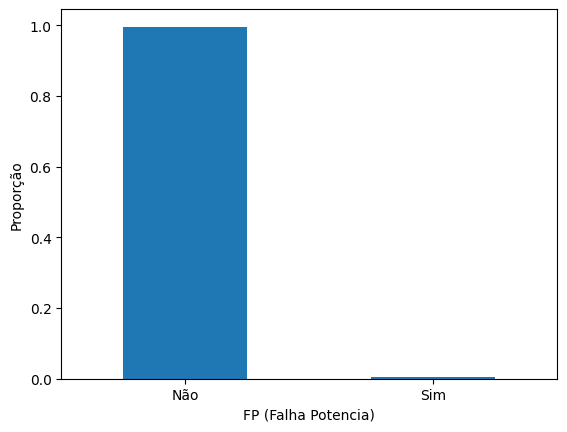

In [12]:
# Distribuição percentual para variável categórica 'FP (Falha Potencia)' (antes do tratamento)
print("Antes do tratamento:")
print(df['FP (Falha Potencia)'].value_counts(normalize=True) * 100)

# Eliminação das linhas indesejadas
df = df[~df['FP (Falha Potencia)'].isin(['1','0','N'])]

# Distribuição após remoção
print("\nApós remoção de 1, 0, N:")
print(df['FP (Falha Potencia)'].value_counts(normalize=True) * 100)

# Padronizar os valores para 'Sim' e 'Não'
df['FP (Falha Potencia)'] = df['FP (Falha Potencia)'].replace({'nao': 'Não', 'sim': 'Sim','não': 'Não'})

# Distribuição final após padronização
print("\nApós padronização (Sim/Não):")
print(df['FP (Falha Potencia)'].value_counts(normalize=True) * 100)
      
# Gráfico de barras para variável categórica 'FP (Falha Potencia)' após tratamento
ax = df['FP (Falha Potencia)'].value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('FP (Falha Potencia)')
ax.set_ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

#### Variável FTE (Falha Tensao Excessiva)

Antes do tratamento:
FTE (Falha Tensao Excessiva)
False    99.544452
True      0.455548
Name: proportion, dtype: float64

Após padronização (Sim/Não):
FTE (Falha Tensao Excessiva)
Não    99.544452
Sim     0.455548
Name: proportion, dtype: float64


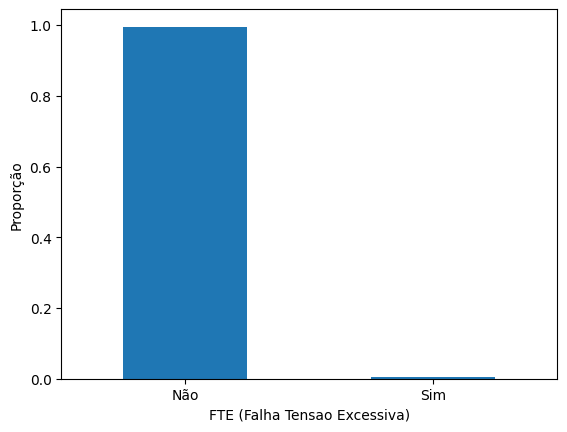

In [13]:
# Distribuição percentual para variável categórica 'FTE (Falha Tensao Excessiva)' (antes do tratamento)
print("Antes do tratamento:")
print(df['FTE (Falha Tensao Excessiva)'].value_counts(normalize=True) * 100)

# Conversão para tipo string
df['FTE (Falha Tensao Excessiva)'] = df["FTE (Falha Tensao Excessiva)"].astype("str")

# Padronização dos valores para 'Sim' e 'Não'
df['FTE (Falha Tensao Excessiva)'] = df['FTE (Falha Tensao Excessiva)'].replace({'False': 'Não', 'True': 'Sim'})

# Distribuição final após padronização
print("\nApós padronização (Sim/Não):")
print(df['FTE (Falha Tensao Excessiva)'].value_counts(normalize=True) * 100)

# Gráfico de barras para variável categórica 'FDC (Falha Dissipacao Calor)' após tratamento
ax = df['FTE (Falha Tensao Excessiva)'].value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('FTE (Falha Tensao Excessiva)')
ax.set_ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

#### Variável FA (Falha Aleatória)

Antes do tratamento:
FA (Falha Aleatoria)
Não    64.420261
não    33.204382
0       1.992118
-       0.191619
Sim     0.133772
sim     0.054232
1       0.003615
Name: proportion, dtype: float64

Após remoção de 1, 0, -:
FA (Falha Aleatoria)
Não    65.860871
não    33.946921
Sim     0.136764
sim     0.055445
Name: proportion, dtype: float64

Após padronização (Sim/Não):
FA (Falha Aleatoria)
Não    99.807792
Sim     0.192208
Name: proportion, dtype: float64


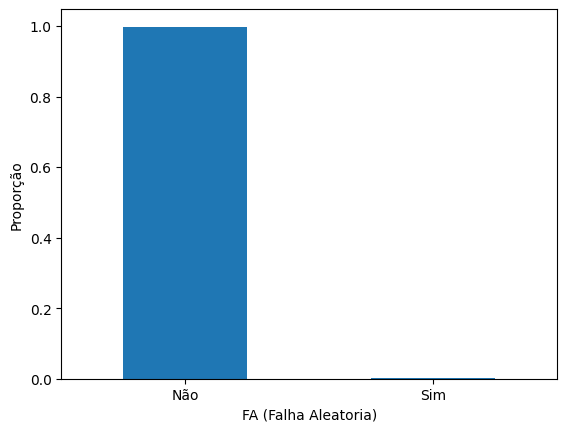

In [14]:
# Distribuição percentual para variável categórica 'FA (Falha Aleatória)' (antes do tratamento)
print("Antes do tratamento:")
print(df['FA (Falha Aleatoria)'].value_counts(normalize=True) * 100)

# Eliminação das linhas indesejadas
df = df[~df['FA (Falha Aleatoria)'].isin(['1','0','-'])]

# Distribuição após remoção
print("\nApós remoção de 1, 0, -:")
print(df['FA (Falha Aleatoria)'].value_counts(normalize=True) * 100)

# Padronizar os valores para 'Sim' e 'Não'
df['FA (Falha Aleatoria)'] = df['FA (Falha Aleatoria)'].replace({'sim': 'Sim','não': 'Não'})

# Distribuição final após padronização
print("\nApós padronização (Sim/Não):")
print(df['FA (Falha Aleatoria)'].value_counts(normalize=True) * 100)

# Gráfico de barras para variável categórica 'FDC (Falha Dissipacao Calor)' após tratamento
ax = df['FA (Falha Aleatoria)'].value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('FA (Falha Aleatoria)')
ax.set_ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

#### Verificação parcial do DataFrame

In [15]:
# Verificação parcial do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27054 entries, 0 to 35259
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               27054 non-null  int64  
 1   id_produto                       27054 non-null  object 
 2   tipo                             27054 non-null  object 
 3   temperatura_ar                   27054 non-null  float64
 4   temperatura_processo             27054 non-null  float64
 5   umidade_relativa                 27054 non-null  float64
 6   velocidade_rotacional            27054 non-null  float64
 7   torque                           27054 non-null  float64
 8   desgaste_da_ferramenta           27054 non-null  float64
 9   falha_maquina                    27054 non-null  object 
 10  FDF (Falha Desgaste Ferramenta)  27054 non-null  object 
 11  FDC (Falha Dissipacao Calor)     27054 non-null  object 
 12  FP (Falha Potencia)    

##### As variáveis de falha passam a estar todas em tipo 'object', padronizadas em respostas binárias 'Sim' ou 'Não'. 

### Análise univariada e tratamento das variáveis de controle

In [16]:
# Gráfico de boxplot para variáveis numéricas contínuas
def plot_boxplots(df, column):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot de {column}')
    plt.xlabel('')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

#### Variável temperatura_ar

In [17]:
# Verificação do número de linhas e colunas do DataFrame
df.shape 

(27054, 15)

temperatura_ar
-36.0     8.678938
 295.3    0.014785
 295.4    0.011089
 295.5    0.048052
 295.6    0.266134
            ...   
 304.0    0.314186
 304.1    0.277223
 304.2    0.229171
 304.3    0.136764
 304.4    0.022178
Name: proportion, Length: 93, dtype: float64


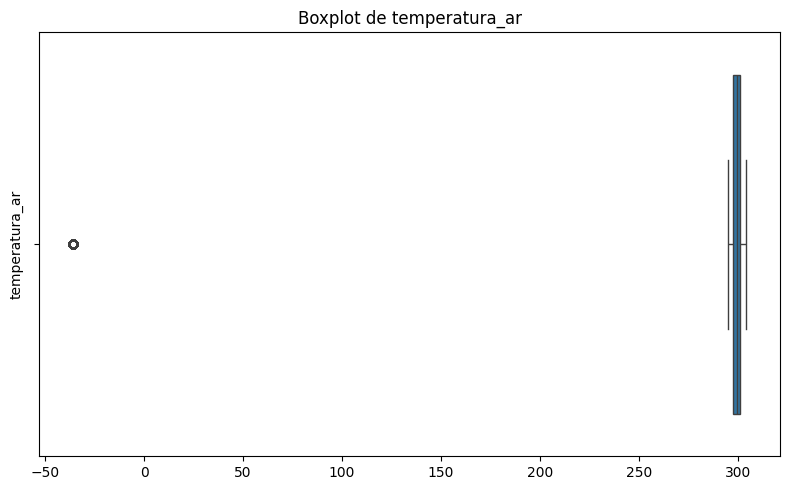

In [18]:
# Valores de contagem e Boxplot para a variável 'temperatura_ar'
print(df['temperatura_ar'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'temperatura_ar')

- Cerca de 8,6% dos registros da variável temperatura_ar apresentam o valor "–36.0".

- Esse comportamento é evidente tanto no value_counts quanto no Boxplot.

- O valor "–36.0" será desconsiderado, pois a variável está em Kelvin (K), escala que não admite valores negativos.

temperatura_ar
295.3    0.016190
295.4    0.012143
295.5    0.052619
295.6    0.291427
295.7    0.109285
           ...   
304.0    0.344046
304.1    0.303570
304.2    0.250951
304.3    0.149761
304.4    0.024286
Name: proportion, Length: 92, dtype: float64


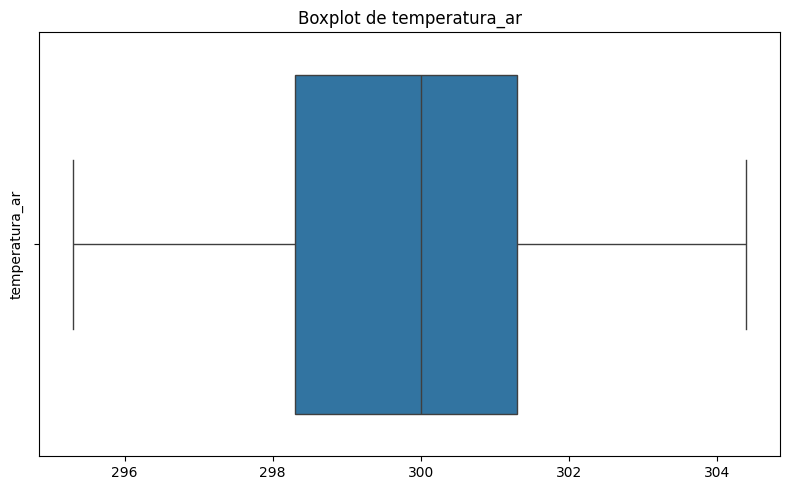

In [19]:
# Remoção do valor inválido '-36.0' para a variável 'temperatura_ar'
df = df[df['temperatura_ar'] != -36.0] 

# Verificação dos valores após remoção
print(df['temperatura_ar'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'temperatura_ar')

#### Variável temperatura_processo

In [20]:
# Verificação do número de linhas e colunas do DataFrame
df.shape

(24706, 15)

temperatura_processo
-38.0     8.443293
 305.7    0.008095
 305.8    0.020238
 305.9    0.012143
 306.0    0.064762
            ...   
 313.4    0.178094
 313.5    0.149761
 313.6    0.085000
 313.7    0.012143
 313.8    0.004048
Name: proportion, Length: 83, dtype: float64


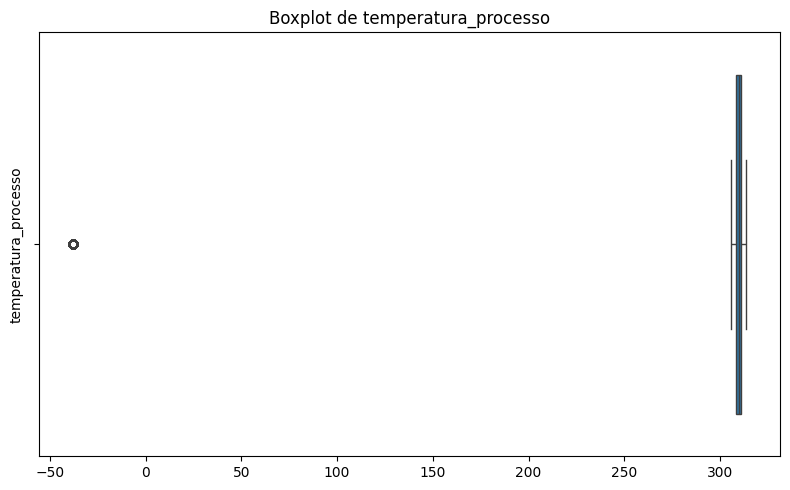

In [21]:
# Valores de contagem e Boxplot para a variável 'temperatura_ar'
print(df['temperatura_processo'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'temperatura_processo')

- Cerca de 8,4% dos registros da variável temperatura_processo apresentam o valor "–38.0".

- Esse comportamento é evidente tanto no value_counts quanto no Boxplot.

- O valor "–38.0" será desconsiderado, pois a variável está em Kelvin (K), escala que não admite valores negativos.

temperatura_processo
305.7    0.008842
305.8    0.022104
305.9    0.013263
306.0    0.070734
306.1    0.137047
           ...   
313.4    0.194518
313.5    0.163572
313.6    0.092838
313.7    0.013263
313.8    0.004421
Name: proportion, Length: 82, dtype: float64


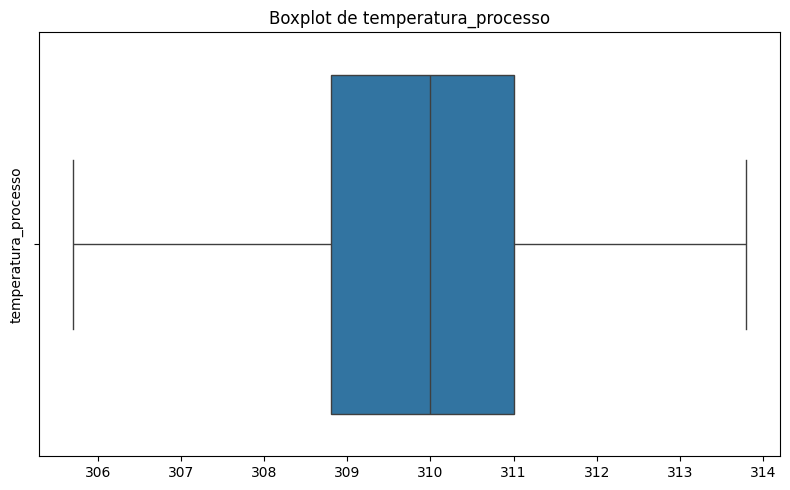

In [22]:
# Remoção do valor inválido '-38.0' para a variável 'temperatura_processo'
df = df[df['temperatura_processo'] != -38.0]

# Verificação dos valores após remoção
print(df['temperatura_processo'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'temperatura_processo')

#### Variável umidade_relativa

In [23]:
# Verificação do número de linhas e colunas do DataFrame
df.shape

(22620, 15)

In [24]:
# Valores de contagem para a variável 'umidade_relativa'
print(df['umidade_relativa'].value_counts(normalize=True).sort_index()* 100)

umidade_relativa
90.0    100.0
Name: proportion, dtype: float64


#### Variável velocidade_rotacional

velocidade_rotacional
-161.0     8.479222
 1183.0    0.008842
 1200.0    0.004421
 1202.0    0.017683
 1207.0    0.004421
             ...   
 2737.0    0.004421
 2825.0    0.004421
 2833.0    0.004421
 2874.0    0.004421
 2886.0    0.004421
Name: proportion, Length: 864, dtype: float64


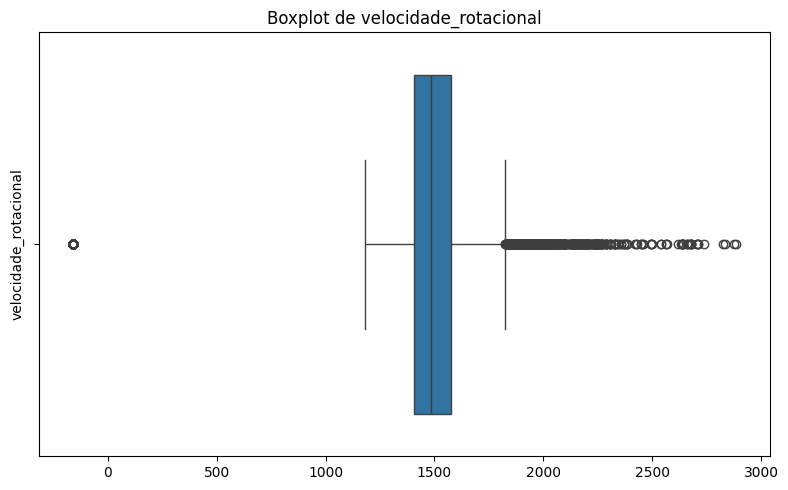

In [25]:
# Valores de contagem e Boxplot para a variável 'velocidade_rotacional'
print(df['velocidade_rotacional'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'velocidade_rotacional')

- Cerca de 8,5% dos registros da variável velocidade_rotacional apresentam o valor "–161.0".

- Esse comportamento é evidente tanto no value_counts quanto no Boxplot.

- O valor "–161.0" será desconsiderado, pois a variável está em RPM (rotações por minuto), escala que admite apenas valores positivos e não possui convenção definida para sentido de rotação.

velocidade_rotacional
1183.0    0.009661
1200.0    0.004830
1202.0    0.019322
1207.0    0.004830
1208.0    0.004830
            ...   
2737.0    0.004830
2825.0    0.004830
2833.0    0.004830
2874.0    0.004830
2886.0    0.004830
Name: proportion, Length: 863, dtype: float64


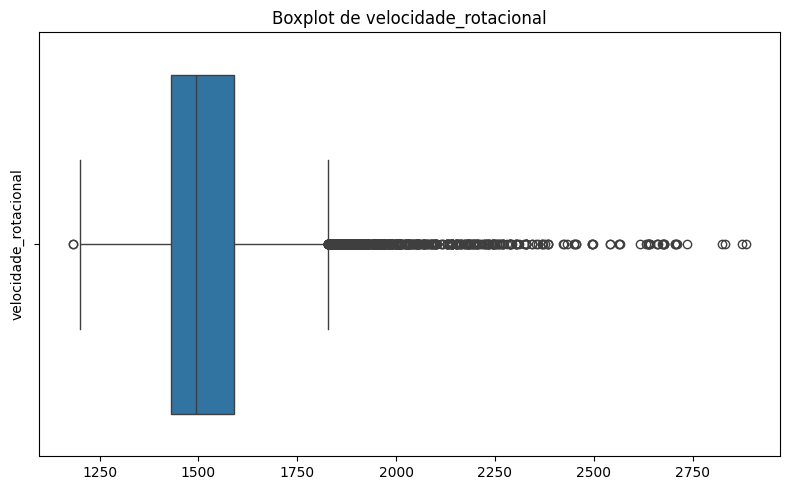

In [26]:
# Remoção do valor inválido '-161.0' para a variável 'velocidade_rotacional'
df = df[df['velocidade_rotacional'] != -161.0]

# Verificação dos valores após remoção
print(df['velocidade_rotacional'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'velocidade_rotacional')

Devido à ausência de informações sobre os intervalos permitidos para as variáveis de controle do problema e considerando que esta análise trata da predição de falhas decorrentes do mau funcionamento das máquinas, não é adequado concluir um tratamento definitivo para os valores extremos indicados no Boxplot da variável 'velocidade_rotacional'.

#### Variável torque

In [27]:
# Verificação do número de linhas e colunas do DataFrame
df.shape

(20702, 15)

torque
3.8     0.004830
4.2     0.004830
5.6     0.004830
5.8     0.004830
8.8     0.004830
          ...   
72.6    0.004830
73.6    0.004830
75.4    0.009661
76.2    0.004830
76.6    0.004830
Name: proportion, Length: 559, dtype: float64


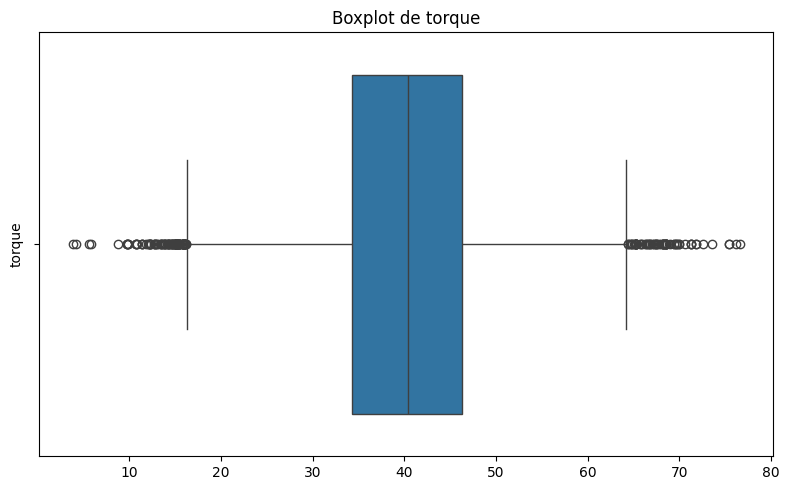

In [28]:
# Valores de contagem e Boxplot para a variável 'torque'
print(df['torque'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'torque')

 Devido à ausência de informações sobre os intervalos permitidos para as variáveis de controle e pelo fato de a análise tratar da predição de falhas decorrentes do mau funcionamento das máquinas, não é adequado definir um tratamento para os valores extremos indicados no Boxplot da variável 'torque'.

#### Variável desgaste_da_ferramenta

In [29]:
# Verificação do número de linhas e colunas do DataFrame
df.shape

(20702, 15)

desgaste_da_ferramenta
-202.0    9.549802
 0.0      2.284803
 2.0      1.106173
 3.0      0.183557
 4.0      0.231862
            ...   
 242.0    0.024152
 244.0    0.009661
 246.0    0.009661
 251.0    0.004830
 253.0    0.004830
Name: proportion, Length: 247, dtype: float64


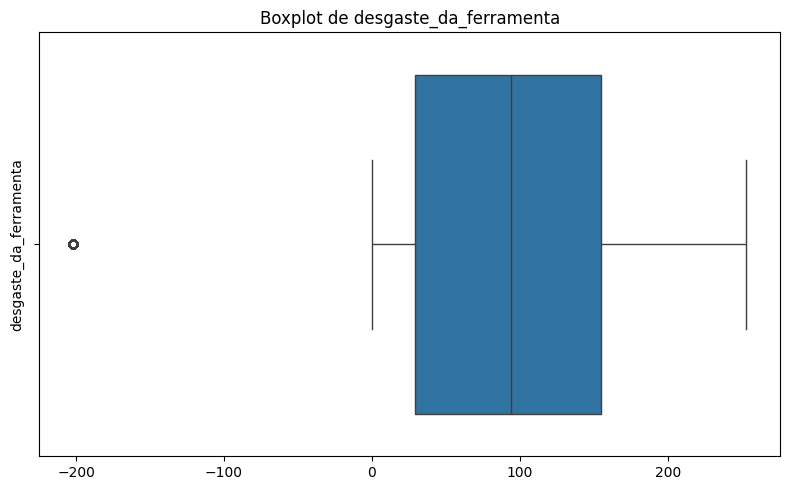

In [30]:
# Valores de contagem e Boxplot para a variável 'desgaste_da_ferramenta'
print(df['desgaste_da_ferramenta'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'desgaste_da_ferramenta')

Devido à ausência de informações sobre os intervalos permitidos para a variável 'desgaste_da_ferramenta' e considerando que esta análise visa à predição de falhas decorrentes do mau funcionamento das máquinas, não é adequado propor um tratamento definitivo para os valores extremos identificados no Boxplot, como o valor –202.0, que aparece com maior frequência relativa.

desgaste_da_ferramenta
0.0      2.526035
2.0      1.222964
3.0      0.202937
4.0      0.256342
5.0      0.918558
           ...   
242.0    0.026702
244.0    0.010681
246.0    0.010681
251.0    0.005340
253.0    0.005340
Name: proportion, Length: 246, dtype: float64


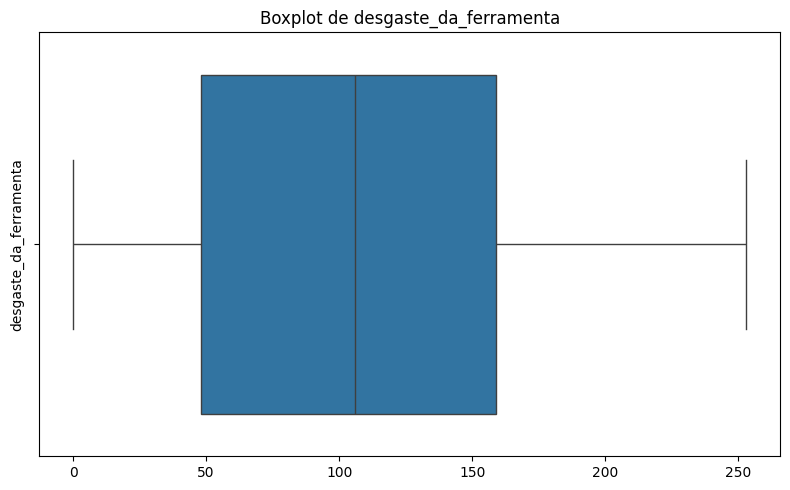

In [31]:
# Remoção do valor inválido '-202.0' para a variável 'desgaste_da_ferramenta'
df = df[df['desgaste_da_ferramenta'] != -202.0]

# Verificação dos valores após remoção
print(df['desgaste_da_ferramenta'].value_counts(normalize=True).sort_index() * 100)
plot_boxplots(df, 'desgaste_da_ferramenta')

#### Verificação final do DataFrame

In [32]:
# Verificação do número de linhas e colunas do DataFrame
df.shape

(18725, 15)

In [33]:
# Verificação final do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18725 entries, 0 to 35259
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               18725 non-null  int64  
 1   id_produto                       18725 non-null  object 
 2   tipo                             18725 non-null  object 
 3   temperatura_ar                   18725 non-null  float64
 4   temperatura_processo             18725 non-null  float64
 5   umidade_relativa                 18725 non-null  float64
 6   velocidade_rotacional            18725 non-null  float64
 7   torque                           18725 non-null  float64
 8   desgaste_da_ferramenta           18725 non-null  float64
 9   falha_maquina                    18725 non-null  object 
 10  FDF (Falha Desgaste Ferramenta)  18725 non-null  object 
 11  FDC (Falha Dissipacao Calor)     18725 non-null  object 
 12  FP (Falha Potencia)    

- Redução do volume de dados: após as alterações no DataFrame, os dados passaram de 15 colunas e 35.260 linhas para 15 colunas e 18.725 linhas.

- Perda proporcional: houve uma redução de aproximadamente 47% dos registros disponíveis para análise.

Possíveis causas:

 - problemas na coleta dos dados;

 - ausência de informações sobre as especificidades das máquinas analisadas;

 - falta de detalhamento nas medições disponibilizadas.

In [34]:
# Salvamento do DataFrame tratado em um novo arquivo CSV
df.to_csv('bootcamp_train_tratado.csv', index=False)

## Pré-processamento e treino dos modelos

O método binário é apresentado primeiro, antes das abordagens multiclasse e multirrótulo, porque utiliza o DataFrame em sua forma original, sem colunas auxiliares criadas nos outros modelos (como num_falhas). Essa ordem evita contaminação dos dados (data leakage) e garante que os resultados reflitam de fato a capacidade preditiva do modelo. 

A sequência escolhida segue um raciocínio hierárquico: primeiro identifica-se se há ou não falha (binário), depois investiga-se a quantidade de falhas (multiclasse) e, por fim, o tipo de falha (multirrótulo).

### Análise e tratamento inicial

In [35]:
# Carregamento do DataFrame tratado para verificação
df = pd.read_csv('bootcamp_train_tratado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18725 entries, 0 to 18724
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               18725 non-null  int64  
 1   id_produto                       18725 non-null  object 
 2   tipo                             18725 non-null  object 
 3   temperatura_ar                   18725 non-null  float64
 4   temperatura_processo             18725 non-null  float64
 5   umidade_relativa                 18725 non-null  float64
 6   velocidade_rotacional            18725 non-null  float64
 7   torque                           18725 non-null  float64
 8   desgaste_da_ferramenta           18725 non-null  float64
 9   falha_maquina                    18725 non-null  object 
 10  FDF (Falha Desgaste Ferramenta)  18725 non-null  object 
 11  FDC (Falha Dissipacao Calor)     18725 non-null  object 
 12  FP (Falha Potencia

In [36]:
# Colunas de falhas 
falha_cols = [
    "FDF (Falha Desgaste Ferramenta)",
    "FDC (Falha Dissipacao Calor)",
    "FP (Falha Potencia)",
    "FTE (Falha Tensao Excessiva)",
    "FA (Falha Aleatoria)",
]

In [37]:
# Converter colunas de falha de 'Sim'/'Não' para 1/0
for col in falha_cols + (["falha_maquina"] if "falha_maquina" in df.columns else []):
    if df[col].dtype == "object":
        df[col] = df[col].map({"Sim": 1, "Não": 0}).astype(int)

### Método Binário - SVM

- A formulação binária simplifica o problema em duas classes: “Sem falha” (0) e “Falha” (1).

- A intenção é verificar se essa simplificação contribui para uma análise mais estável, agrupando todas as falhas em uma única categoria.

- Será analisado se este modelo pode servir como um primeiro filtro de detecção de falhas antes de investigações mais detalhadas.

In [38]:
# Alvo binário: 1 = há alguma falha; 0 = sem falha
y_bin = (df[falha_cols].sum(axis=1) > 0).astype(int)

# Features (remover ids, variável possivelmente constante e colunas-alvo)
drop_cols_bin = ["id", "id_produto", "umidade_relativa"] + falha_cols
if "falha_maquina" in df.columns:
    drop_cols_bin.append("falha_maquina")

# One-Hot Encoding das variáveis categóricas
X_bin = pd.get_dummies(df.drop(columns=[c for c in drop_cols_bin if c in df.columns]), drop_first=True)

# Split estratificado
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42, stratify=y_bin)

# Padronização e SVM com pesos balanceados
svm_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),  # with_mean=False para suportar dummies
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", class_weight="balanced", random_state=42))
])
svm_pipe.fit(X_train_b, y_train_b) # Treinamento do modelo

y_pred_svm = svm_pipe.predict(X_test_b) # Previsões no conjunto de teste

#### Diagnóstico de desempenho

Classification Report — Binário (SVM)
              precision    recall  f1-score   support

   Sem falha     0.9932    0.7535    0.8569      3676
       Falha     0.0523    0.7246    0.0976        69

    accuracy                         0.7530      3745
   macro avg     0.5227    0.7391    0.4772      3745
weighted avg     0.9759    0.7530    0.8429      3745



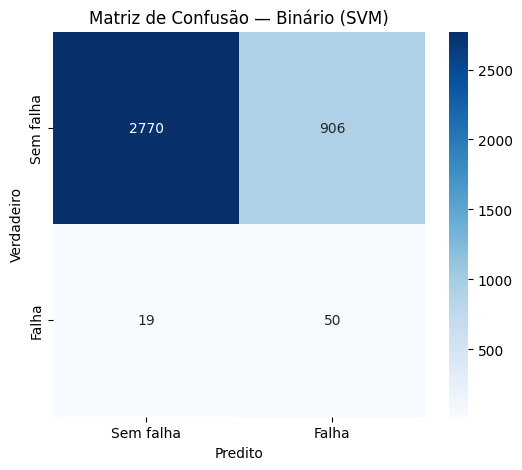

Métricas adicionais — Binário (SVM)
Accuracy:             0.7530
Balanced Accuracy:    0.7391
Recall (classe Falha):0.7246


In [39]:
classes_nomes_bin = ["Sem falha", "Falha"]

# Classification Report
print("Classification Report — Binário (SVM)")
print(classification_report(y_test_b, y_pred_svm, target_names=classes_nomes_bin, digits=4))

# Matriz de Confusão
cm = confusion_matrix(y_test_b, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes_nomes_bin, yticklabels=classes_nomes_bin)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão — Binário (SVM)")
plt.show()

# Métricas adicionais
acc = accuracy_score(y_test_b, y_pred_svm)
bal_acc = balanced_accuracy_score(y_test_b, y_pred_svm)
recall_falha = recall_score(y_test_b, y_pred_svm, pos_label=1)

print("Métricas adicionais — Binário (SVM)")
print(f"Accuracy:             {acc:.4f}")
print(f"Balanced Accuracy:    {bal_acc:.4f}")
print(f"Recall (classe Falha):{recall_falha:.4f}")

##### Resumo dos resultados:

- Sem falha → precision 0.99, recall 0.75, F1 ≈ 0.86.

- Falha → precision 0.05, recall 0.72, F1 ≈ 0.10.

- Accuracy geral: 0.75

- Balanced Accuracy: 0.74

- Recall (falha): 0.72

Qualidades:

- Consegue detectar a maioria das falhas (recall alto da classe Falha).

- Balanced Accuracy mostra que o modelo equilibra relativamente bem as duas classes.

- Útil para não deixar passar falhas reais (boa para manutenção preventiva).

Problemas:

- Precision da classe Falha é baixíssima (0.05), ou seja, a maior parte dos casos classificados como falha são falsos positivos.

- F1 da classe Falha também é muito baixo, mostrando desequilíbrio entre precision e recall.

- Accuracy de 75% parece razoável, mas é puxada para baixo pelo grande número de falsos alarmes.

#### DataFrame teste

- Após o treinamento e avaliação dos modelos com o conjunto de dados rotulado, aplicamos agora o método no novo DataFrame de teste. Este conjunto não contém rótulos nem colunas de falha, de modo que a análise se limita à geração de previsões a partir das variáveis disponíveis.

In [40]:
# Conjunto de teste
df_test = pd.read_csv('bootcamp_test.csv')
df_test.head()

,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta
0,35260,L53432,L,300.8,310.3,90.0,1538,36.1,198
1,35261,M19544,M,303.6,311.8,90.0,1421,44.8,101
2,35262,M16591,M,298.3,307.9,90.0,1485,42.0,117
3,35263,L51922,L,303.3,311.3,90.0,1592,33.7,14
4,35264,L51701,L,302.4,310.4,90.0,1865,23.9,129


In [41]:
# Cópia do df de teste
df_test_bin = df_test.copy()

# Seleção de features igual ao treino
drop_cols_bin = ["id", "id_produto", "umidade_relativa"]
X_test_bin_new = pd.get_dummies(
    df_test_bin.drop(columns=[c for c in drop_cols_bin if c in df_test_bin.columns]),
    drop_first=True
)

# Alinhando colunas ao treino
X_test_bin_new = X_test_bin_new.reindex(columns=X_train_b.columns, fill_value=0)

# Previsão
y_pred_bin = svm_pipe.predict(X_test_bin_new)

# Resultado
pred_bin_df = pd.DataFrame({
    "id": df_test_bin["id"] if "id" in df_test_bin.columns else range(len(df_test_bin)),
    "pred_binaria": y_pred_bin,
    "pred_label": pd.Series(y_pred_bin).map({0: "Sem falha", 1: "Falha"})
})
print(pred_bin_df.head()) # Visualização das primeiras linhas
pred_bin_df.to_csv('predicoes_modelo_binario.csv', index=False)

      id  pred_binaria pred_label
0  35260             0  Sem falha
1  35261             1      Falha
2  35262             0  Sem falha
3  35263             0  Sem falha
4  35264             0  Sem falha


In [42]:
# Distribuição das previsões
print("Distribuição de previsões — Binário (SVM)")
print(pred_bin_df["pred_label"].value_counts(normalize=True).round(3))

Distribuição de previsões — Binário (SVM)
pred_label
Sem falha    0.738
Falha        0.262
Name: proportion, dtype: float64


### Método Multiclasse -  Decision Tree



- Este método organiza as amostras em classes de acordo com a quantidade de falhas simultâneas: 0 (sem falha), 1 (uma falha) ou 2+ (mais de uma falha).

- A abordagem busca avaliar não apenas a ocorrência, mas também a intensidade do problema.

- Será avaliado se essa formulação pode ser útil para diferenciar níveis distintos de falhas.

In [43]:
# Criar alvo: quantidade de falhas simultâneas 
df["num_falhas"] = df[falha_cols].sum(axis=1)

# Criando features (remover identificadores, variável constante, alvos)
drop_cols_mc = ["id", "id_produto", "umidade_relativa", "num_falhas"] + falha_cols
if "falha_maquina" in df.columns:
    drop_cols_mc.append("falha_maquina")

# Criando alvo: quantidade de falhas simultâneas
X_mc = df.drop(columns=["id", "id_produto", "umidade_relativa"] + falha_cols + ["falha_maquina", "num_falhas"])
X_mc = pd.get_dummies(X_mc, drop_first=True)
y_mc = df["num_falhas"].clip(upper=2)

# Split dos dados em treino e teste
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42, stratify=y_mc)

# Modelagem - Decision Tree para classificação multiclasse
dt_mc = DecisionTreeClassifier(random_state=42, max_depth=6)
dt_mc.fit(X_train_mc, y_train_mc)
y_pred_dt_mc = dt_mc.predict(X_test_mc)

#### Diagnóstico de desempenho

Ainda que esse modelo apresente uma acurácia muito alta, devido ao desbalanceamento entre os dados fornecidos, pois existem muito mais dados referentes a funcionamento sem falhas, esse modelo não se mostra muito útil na aplicação indicada.

Isso pode ser facilmente visualizado pelo relatório e Matriz de Confusão abaixo.

Classification Report — Multiclasse (Decision Tree)
              precision    recall  f1-score   support

   Sem falha     0.9857    0.9970    0.9913      3676
     1 falha     0.6000    0.2239    0.3261        67
   2+ falhas     0.0000    0.0000    0.0000         2

    accuracy                         0.9826      3745
   macro avg     0.5286    0.4070    0.4391      3745
weighted avg     0.9783    0.9826    0.9789      3745



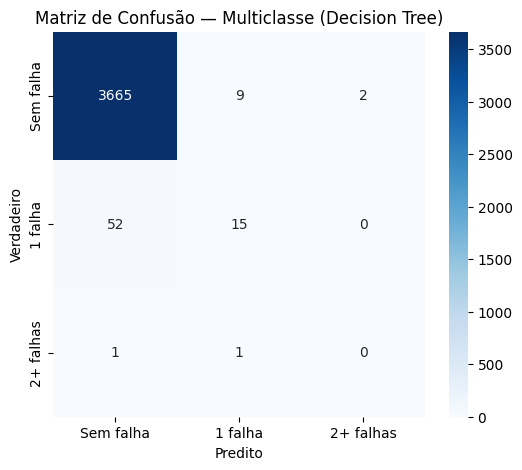

Métricas Resumidas — Multiclasse
Accuracy:             0.9826
Balanced Accuracy:    0.4070  (média dos recalls por classe)
MCC:                  0.3525  (correlação predito vs. real; -1 a +1)


In [44]:
classes_nomes = ["Sem falha", "1 falha", "2+ falhas"]

# Classification Report
print("Classification Report — Multiclasse (Decision Tree)")
print(classification_report(y_test_mc, y_pred_dt_mc, target_names=classes_nomes, digits=4))

# Matriz de Confusão
cm = confusion_matrix(y_test_mc, y_pred_dt_mc)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes_nomes, yticklabels=classes_nomes)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão — Multiclasse (Decision Tree)")
plt.show()

# Métricas resumidas
acc_mc     = accuracy_score(y_test_mc, y_pred_dt_mc)
balacc_mc  = balanced_accuracy_score(y_test_mc, y_pred_dt_mc)
mcc_mc     = matthews_corrcoef(y_test_mc, y_pred_dt_mc)

print("Métricas Resumidas — Multiclasse")
print(f"Accuracy:             {acc_mc:.4f}")
print(f"Balanced Accuracy:    {balacc_mc:.4f}  (média dos recalls por classe)")
print(f"MCC:                  {mcc_mc:.4f}  (correlação predito vs. real; -1 a +1)")

##### Resumo dos resultados

- Sem falha → precision ≈ 0.99, recall ≈ 1.00.

- 1 falha → precision 0.60, recall 0.22.

- 2+ falhas → recall 0.00, modelo ignora completamente essa classe.

- Accuracy geral: 0.98 (aparentemente muito alto).

- Balanced Accuracy: 0.41 (mostra o desbalanceamento).

- MCC: 0.35 (baixa correlação real entre predito e verdadeiro).

Qualidades:

- Funciona muito bem para a classe majoritária (Sem falha).

- Fácil de interpretar e rápido de treinar.

Problemas:

- Accuracy é enganosa: valor alto porque quase todas as amostras são “Sem falha”.

- Recall das classes minoritárias é muito baixo, chegando a zero para “2+ falhas”.

- Balanced Accuracy e MCC revelam o fracasso do modelo em lidar com desbalanceamento.

#### DataFrame teste

- Após o treinamento e avaliação dos modelos com o conjunto de dados rotulado, aplicamos agora o método no novo DataFrame de teste. Este conjunto não contém rótulos nem colunas de falha, de modo que a análise se limita à geração de previsões a partir das variáveis disponíveis.

In [45]:
# Cópia do df de teste
df_test_mc = df_test.copy()

# Seleção de features igual ao treino
drop_cols_mc = ["id", "id_produto", "umidade_relativa"]
X_test_mc_new = pd.get_dummies(
    df_test_mc.drop(columns=[c for c in drop_cols_mc if c in df_test_mc.columns]),
    drop_first=True
)

# Alinhando colunas ao treino
X_test_mc_new = X_test_mc_new.reindex(columns=X_train_mc.columns, fill_value=0)

y_pred_mc = dt_mc.predict(X_test_mc_new)

# Resultado
label_map_mc = {0: "Sem falha", 1: "1 falha", 2: "2+ falhas"}

# DataFrame de resultados
pred_mc_df = pd.DataFrame({
    "id": df_test_mc["id"] if "id" in df_test_mc.columns else range(len(df_test_mc)),
    "pred_num_falhas": y_pred_mc,
    "pred_label": pd.Series(y_pred_mc).map(label_map_mc)
})
print(pred_mc_df.head()) # Visualização das primeiras linhas
pred_mc_df.to_csv('predicoes_modelo_multiclasse.csv', index=False) # Salvamento do resultado

      id  pred_num_falhas pred_label
0  35260                0  Sem falha
1  35261                0  Sem falha
2  35262                0  Sem falha
3  35263                0  Sem falha
4  35264                0  Sem falha


In [46]:
# Distribuição das previsões
print("Distribuição de previsões — Multiclasse (Decision Tree)")
print(pred_mc_df["pred_label"].value_counts(normalize=True).round(3))

Distribuição de previsões — Multiclasse (Decision Tree)
pred_label
Sem falha    0.99
1 falha      0.01
2+ falhas    0.00
Name: proportion, dtype: float64


### Método Multirrótolo - Random Forest

- Neste método, cada tipo de falha é tratado como uma variável de saída independente, permitindo que múltiplas falhas sejam previstas ao mesmo tempo.

- A abordagem possibilita identificar quais falhas específicas ocorrem em cada amostra.

- Será investigado se o modelo consegue capturar bem tanto falhas mais frequentes quanto falhas mais raras.

In [47]:
# Criando features (remover identificadores, variável possivelmente constante e as colunas-alvo)
drop_cols_mr = ["id", "id_produto", "umidade_relativa"] + falha_cols
if "falha_maquina" in df.columns:
    drop_cols_mr.append("falha_maquina")

X_mr = df.drop(columns=drop_cols_mr)
X_mr = pd.get_dummies(X_mr, drop_first=True)

# Alvo multirrótulo: cada falha é uma coluna binária
y_mr = df[falha_cols].astype(int)

# Split dos dados em treino e teste
# (estratificar pela soma de falhas capada ajuda no balanceamento sem alterar y_mr)
strata_mr = y_mr.sum(axis=1).clip(upper=2)  # 0, 1, 2+
X_train_mr, X_test_mr, y_train_mr, y_test_mr = train_test_split(
    X_mr, y_mr, test_size=0.2, random_state=42, stratify=strata_mr
)

# Modelagem — Random Forest em configuração MultiOutput (um RF por rótulo)
rf_base = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, n_jobs=-1)
rf_mr = MultiOutputClassifier(rf_base)
rf_mr.fit(X_train_mr, y_train_mr)

# Predições
y_pred_rf_mr = rf_mr.predict(X_test_mr)

#### Diagnóstico de desempenho

Classification Report — Multirrótulo (RF MultiOutput)
                                 precision    recall  f1-score   support

FDF (Falha Desgaste Ferramenta)     1.0000    0.3333    0.5000         6
   FDC (Falha Dissipacao Calor)     0.9048    0.9048    0.9048        21
            FP (Falha Potencia)     0.9091    0.6250    0.7407        16
   FTE (Falha Tensao Excessiva)     0.7778    0.3684    0.5000        19
           FA (Falha Aleatoria)     1.0000    0.2222    0.3636         9

                      micro avg     0.8889    0.5634    0.6897        71
                      macro avg     0.9183    0.4907    0.6018        71
                   weighted avg     0.8919    0.5634    0.6567        71
                    samples avg     0.0104    0.0103    0.0103        71



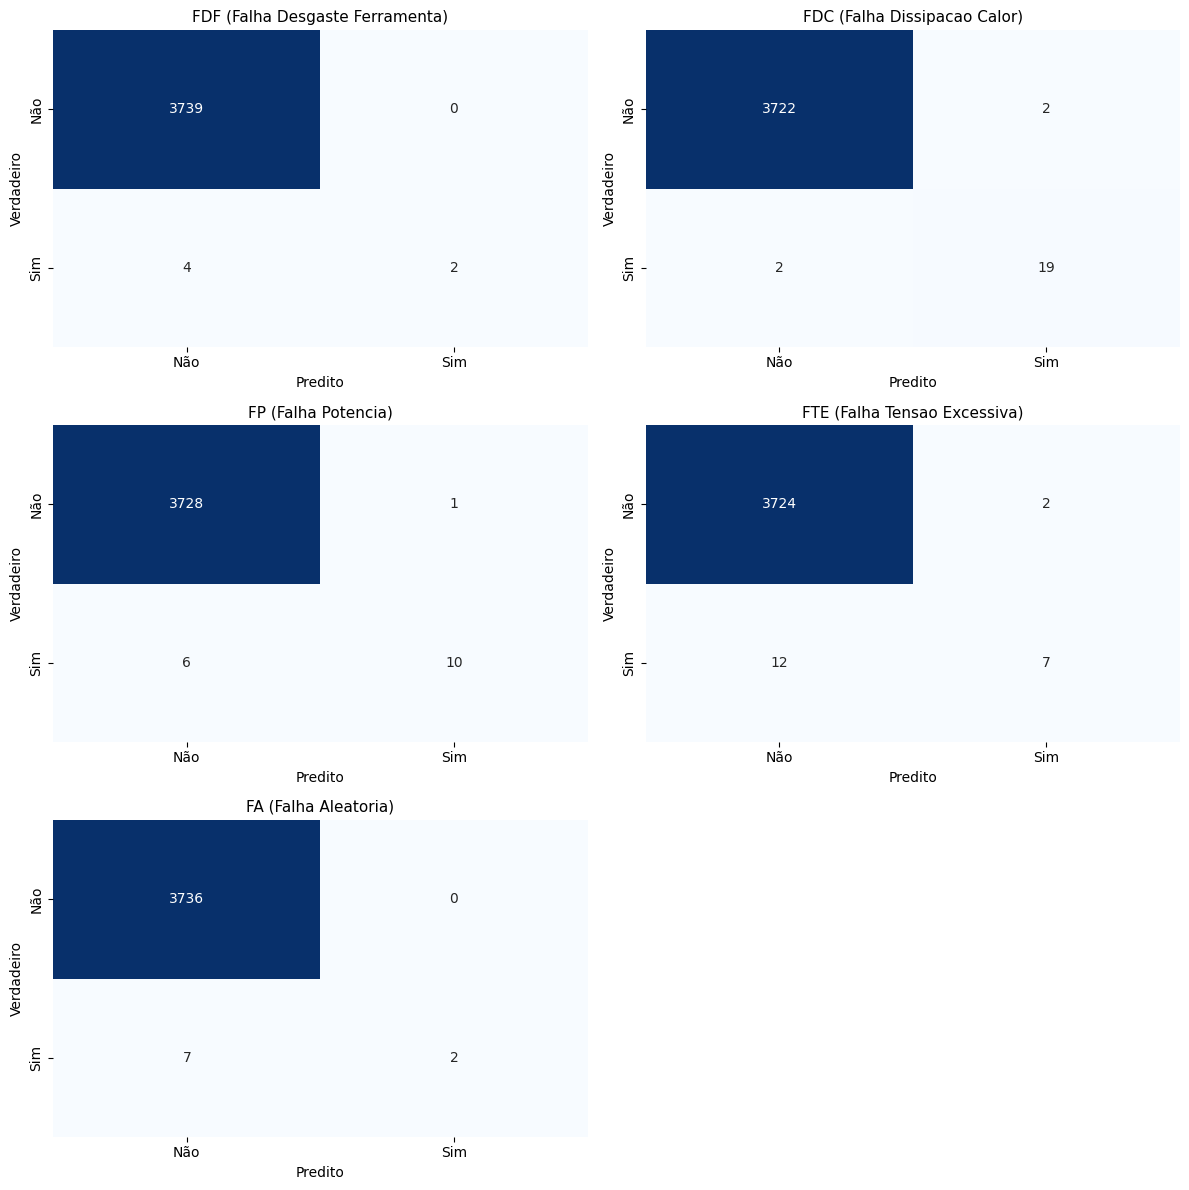

<Figure size 640x480 with 0 Axes>

Métricas adcionais — Multirrótulo
Accuracy (Exact Match): 0.9915
Jaccard (samples):      0.0103
Hamming Loss:           0.0019  (fração média de rótulos errados por amostra)


In [48]:
# Classification Report
print("Classification Report — Multirrótulo (RF MultiOutput)")
print(classification_report(y_test_mr, y_pred_rf_mr, target_names=falha_cols, digits=4, zero_division=0))

# Matriz de Confusão
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 linhas, 2 colunas
axes = axes.flatten()

for i, col in enumerate(falha_cols):
    cm = confusion_matrix(y_test_mr[col], y_pred_rf_mr[:, i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"],
                ax=axes[i])
    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel("Predito")
    axes[i].set_ylabel("Verdadeiro")

# Desliga os subplots sobrando
for j in range(len(falha_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

fig.delaxes(axes[-1]) # remove o último eixo se não for usado

plt.tight_layout()
plt.show()

# Métricas adicionais
y_true = y_test_mr[falha_cols].values
y_pred = y_pred_rf_mr

subset_acc   = accuracy_score(y_true, y_pred)  # equaivalente a "Accuracy"
jacc_samples = jaccard_score(y_true, y_pred, average="samples", zero_division=0) # média do Jaccard por amostra
hamm         = hamming_loss(y_true, y_pred) # fração média de rótulos errados por amostra

print("Métricas adcionais — Multirrótulo")
print(f"Accuracy (Exact Match): {subset_acc:.4f}")
print(f"Jaccard (samples):      {jacc_samples:.4f}")
print(f"Hamming Loss:           {hamm:.4f}  (fração média de rótulos errados por amostra)")

Resumo dos resultados

- Falhas comuns (FDC, FP) → precision e recall razoáveis (0.62–0.90).

- Falhas raras (FDF, FA) → recall muito baixo (0.22–0.33).

Métricas globais:

- Micro avg F1: 0.69 (melhor que multiclasse, mas longe do ideal).

- Subset Accuracy: 0.99 (aparentemente excelente, mas enganoso: quase sempre acerta “sem falha”).

- Jaccard (samples): 0.01 → mostra que quase nunca prevê o conjunto de falhas completo.

- Hamming Loss: 0.0019 → parece baixo, mas também é reflexo do desbalanceamento.

Qualidades:

- Permite prever quais falhas ocorrem, trazendo granularidade.

- Melhor em falhas mais frequentes (FDC, FP).

- Random Forest tende a ser robusto a ruídos.

Problemas:

- Falhas raras continuam quase invisíveis para o modelo.

- Subset Accuracy é ilusória, já que prever tudo como “sem falha” dá valor alto.

- Jaccard expõe a limitação real: quase nunca acerta o conjunto completo de falhas.

#### DataFrame teste

- Após o treinamento e avaliação dos modelos com o conjunto de dados rotulado, aplicamos agora o método no novo DataFrame de teste. Este conjunto não contém rótulos nem colunas de falha, de modo que a análise se limita à geração de previsões a partir das variáveis disponíveis.

In [49]:
# Cópia do df de teste
df_test_mr = df_test.copy()

# Seleção de features igual ao treino
drop_cols_mr = ["id", "id_produto", "umidade_relativa"]
X_test_mr_new = pd.get_dummies(
    df_test_mr.drop(columns=[c for c in drop_cols_mr if c in df_test_mr.columns]),
    drop_first=True
)

# Alinhando colunas ao treino
X_test_mr_new = X_test_mr_new.reindex(columns=X_train_mr.columns, fill_value=0)

Y_pred_mr = rf_mr.predict(X_test_mr_new)  # matriz (n_amostras × n_falhas)

pred_mr_df = pd.DataFrame(Y_pred_mr, columns=falha_cols) # DataFrame das previsões

# Adiciona coluna 'id' no df de teste
pred_mr_df.insert(0, "id", df_test_mr["id"] if "id" in df_test_mr.columns else range(len(df_test_mr)))
print(pred_mr_df.head()) # Visualização das primeiras linhas
pred_mr_df.to_csv('predicoes_modelo_multirrotulo.csv', index=False) # Salvamento do resultado

      id  FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
0  35260                                0                             0   
1  35261                                0                             0   
2  35262                                0                             0   
3  35263                                0                             0   
4  35264                                0                             0   

   FP (Falha Potencia)  FTE (Falha Tensao Excessiva)  FA (Falha Aleatoria)  
0                    0                             0                     0  
1                    0                             0                     0  
2                    0                             0                     0  
3                    0                             0                     0  
4                    0                             0                     0  


In [50]:
# Distribuição das previsões
print("Distribuição de previsões — Multirrótulo")
print(pred_mr_df[falha_cols].sum().sort_values(ascending=False))

Distribuição de previsões — Multirrótulo
FDF (Falha Desgaste Ferramenta)    0
FDC (Falha Dissipacao Calor)       0
FP (Falha Potencia)                0
FTE (Falha Tensao Excessiva)       0
FA (Falha Aleatoria)               0
dtype: int64
